In [28]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
import warnings  

# Ignorar todos os avisos  
warnings.filterwarnings("ignore")  

# Ou utilizando um gerenciador de contexto  
with warnings.catch_warnings():  
    warnings.simplefilter("ignore")  
    # código que gera avisos

In [29]:
# Cria um dataset chamado 'df' que receberá os dados do CSV
df = pd.read_csv('FuelConsumptionCo2.csv')

# Exibe a estrutura inicial do dataframe
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [30]:
# Exibe um resumo do Dataset
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [31]:
# Selecionando apenas as features do motor e Co2
engines = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]

engines.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [32]:
# Dividindo o dataset em dados de treinamento e dados de teste
engines_train, engines_test, co2_train, co2_test = train_test_split(engines, co2, test_size=0.2, random_state=42)
type(engines_train)

pandas.core.frame.DataFrame

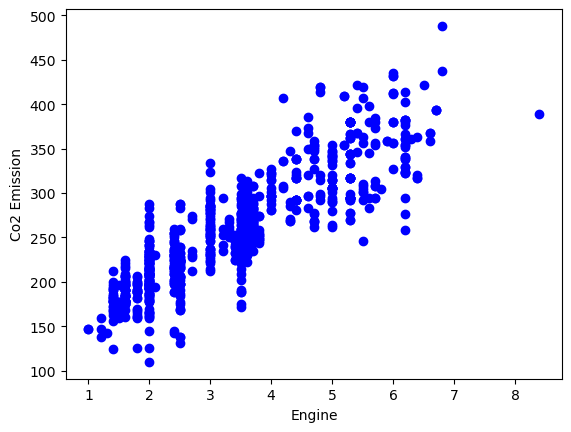

In [33]:
# Plotagem de correlação entre as features do dataset de treino
plt.scatter(engines_train, co2_train, color='blue')
plt.xlabel('Engine')
plt.ylabel('Co2 Emission')
plt.show()

In [34]:
# Criando um modelo de tipo de Regressão Linear
model = linear_model.LinearRegression()

# Treinando o modelo usando o dataset de teste
# O algoritmo retorna o valor de A e B (Y = A + B.X)
model.fit(engines_train, co2_train)

LinearRegression()

In [35]:
# Exibindo os coeficientes (A e B)
print('(A) Intercept: ', model.intercept_)  # Interceptação
print('(B) Tilt: ', model.coef_)            # Inclinação

(A) Intercept:  [126.28970217]
(B) Tilt:  [[38.99297872]]


Text(0.5, 0, 'Engines')

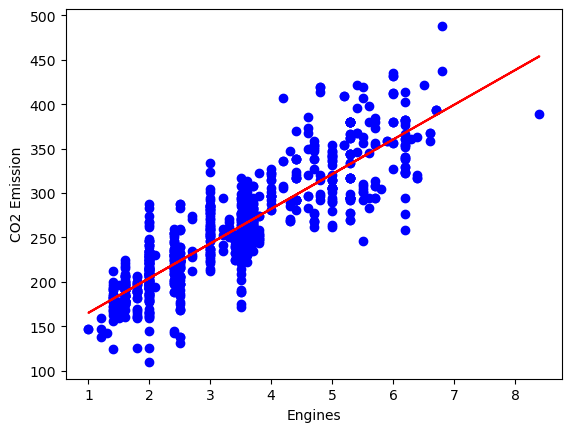

In [36]:
# Exibindo a reta de regressão no dataset de treino
plt.scatter(engines_train, co2_train, color='blue')
plt.plot(engines_train, model.coef_[0][0]*engines_train + model.intercept_[0], '-r')
plt.ylabel('CO2 Emission')
plt.xlabel('Engines')

In [37]:
# Realizando as predições no dataset de teste
co2Predictions = model.predict(engines_test)

Text(0.5, 0, 'Engines')

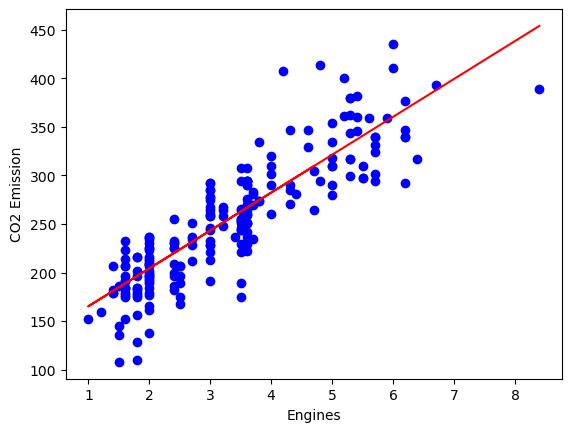

In [38]:
# Exibindo a reta de regressão no dataset de teste
plt.scatter(engines_test, co2_test, color='blue')
plt.plot(engines_test, model.coef_[0][0]*engines_test + model.intercept_[0], '-r')
plt.ylabel('CO2 Emission')
plt.xlabel('Engines')

In [40]:
# Avaliando o modelo com as principais métricas
# Soma dos Erros ao Quadrado (SSE)
print("Sum of Squares Error (SSE): %.2f " % np.sum((co2Predictions - co2_test)**2, axis=0))

# Erro Quadrático Médio (MSE)
print("Mean Squared Error (MSE): %.2f " % mean_squared_error(co2_test, co2Predictions))

# Erro Médio Absoluto (MAE)
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(co2_test, co2Predictions))

# Raiz do Erro Quadrático Médio (RMSE)
print("Root Mean Squared Error (RMSE): %.2f " % sqrt(mean_squared_error(co2_test, co2Predictions)))

# R2-score
print("R2-score: %.2f" % r2_score(co2_test, co2Predictions))

Sum of Squares Error (SSE): 210990.77 
Mean Squared Error (MSE): 985.94 
Mean Absolute Error (MAE): 24.10
Root Mean Squared Error (RMSE): 31.40 
R2-score: 0.76
